# Visualization of Bulk RNA-seq

In this part, we will introduce the tutorial of special plot of `omicverse`.

In [2]:
import omicverse as ov
import scanpy as sc
import matplotlib.pyplot as plt
ov.plot_set(font_path='Arial')
!date

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5
✅ [GPU 1] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.

2025年 08月 05日 星期二 10:26:31 CST


## Venn plot

In transcriptome analyses, we often have to study differential genes that are common to different groups. Here, we provide `ov.pl.venn` to draw venn plots to visualise differential genes.

**Function**: `ov.pl.venn`: 
- sets: Subgroups requiring venn plots, Dictionary format, keys no more than 4
- palette: You can also re-specify the colour bar that needs to be drawn, just set `palette=['#FFFFFF','#000000']`, we have prepared `ov.pl.red_color`,`ov.pl.blue_color`,`ov.pl.green_color`,`ov.pl.orange_color`, by default.
- fontsize: the fontsize and linewidth to visualize, fontsize will be multiplied by 2

Text(0.5, 1.0, 'Venn4')

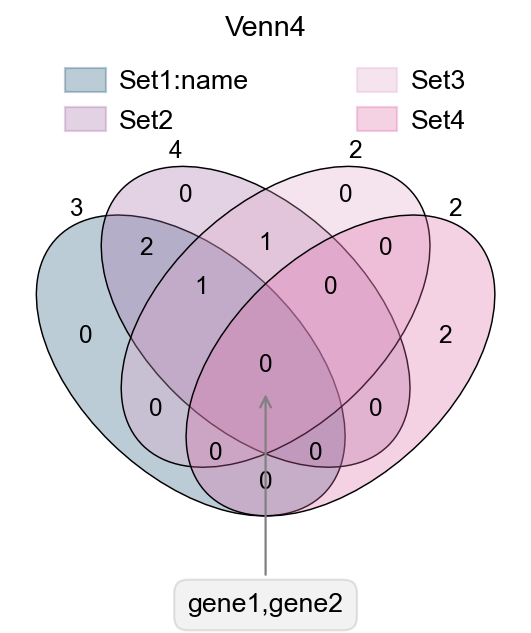

In [3]:
fig,ax=plt.subplots(figsize = (4,4))
#dict of sets
sets = {
    'Set1:name': {1,2,3},
    'Set2': {1,2,3,4},
    'Set3': {3,4},
    'Set4': {5,6}
}
#plot venn   
ov.pl.venn(sets=sets,palette=ov.pl.sc_color,
           fontsize=5.5,ax=ax,
           )


#If we need to annotate genes, we can use plt.annotate for this purpose, 
#we need to modify the text content, xy and xytext parameters.
plt.annotate('gene1,gene2', xy=(50,30), xytext=(0,-100),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

#Set the title
plt.title('Venn4',fontsize=13)

#save figure
# fig.savefig("figures/bulk_venn4.png",dpi=300,bbox_inches = 'tight')

Text(0.5, 1.0, 'Venn3')

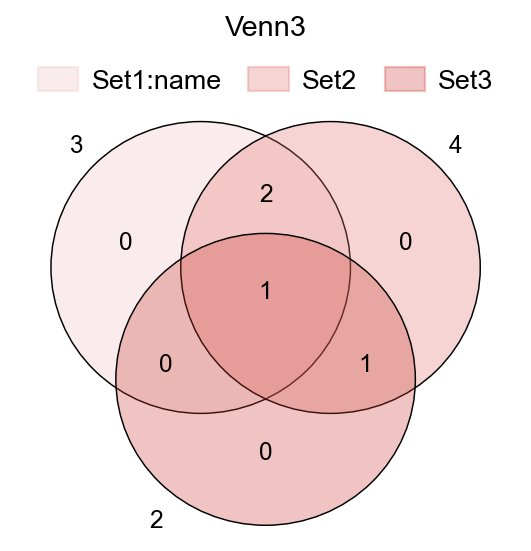

In [4]:
fig,ax=plt.subplots(figsize = (4,4))
#dict of sets
sets = {
    'Set1:name': {1,2,3},
    'Set2': {1,2,3,4},
    'Set3': {3,4},
}
    
ov.pl.venn(sets=sets,ax=ax,fontsize=5.5,
           palette=ov.pl.red_color)

plt.title('Venn3',fontsize=13)

## Volcano plot

For differentially expressed genes, we tend to visualise them only with volcano plots. Here, we present a method for mapping volcanoes using Python `ov.pl.volcano`.

**Function**: `ov.pl.venn`: 

main argument
- result: the DEGs result
- pval_name: the names of the columns whose vertical coordinates need to be plotted, stored in result.columns. In Bulk RNA-seq experiments, we usually set this to qvalue.
- fc_name: The names of the columns for which you need to plot the horizontal coordinates, stored in result.columns. In Bulk RNA-seq experiments, we typically set this to log2FC.
- fc_max: We need to set the threshold for the difference foldchange
- fc_min: We need to set the threshold for the difference foldchange
- pval_threshold: We need to set the threshold for the qvalue
- pval_max: We also need to set boundary values so that the data is not too large to affect the visualisation
- FC_max: We also need to set boundary values so that the data is not too large to affect the visualisation

plot argument
- figsize: The size of the generated figure, by default (4,4).
- title: The title of the plot, by default ''.
- titlefont: A dictionary of font properties for the plot title, by default {'weight':'normal','size':14,}.
- up_color: The color of the up-regulated genes in the plot, by default '#e25d5d'.
- down_color: The color of the down-regulated genes in the plot, by default '#7388c1'.
- normal_color: The color of the non-significant genes in the plot, by default '#d7d7d7'.
- legend_bbox: A tuple containing the coordinates of the legend's bounding box, by default (0.8, -0.2).
- legend_ncol: The number of columns in the legend, by default 2.
- legend_fontsize: The font size of the legend, by default 12.
- plot_genes: A list of genes to be plotted on the volcano plot, by default None.
- plot_genes_num: The number of genes to be plotted on the volcano plot, by default 10.
- plot_genes_fontsize: The font size of the genes to be plotted on the volcano plot, by default 10.
- ticks_fontsize: The font size of the ticks, by default 12.

In [5]:
result=ov.read('data/dds_result.csv',index_col=0)
result.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,qvalue,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),sig
EIF5A2,181.826090,-5.733509,0.420041,-13.649891,2.020000e-42,6.250000e-38,6.250000e-38,41.7,37.2,181.826090,7.51,-5.733509,5.73,down
AASDH,103.320545,-4.620975,0.340252,-13.581053,5.190000e-42,8.010000e-38,8.010000e-38,41.3,37.1,103.320545,6.69,-4.620975,4.62,down
CCSER1,130.968148,-2.640100,0.202526,-13.035891,7.650000e-39,7.790000e-35,7.790000e-35,38.1,34.1,130.968148,7.03,-2.640100,2.64,down
FTH1,1998.033709,-3.284481,0.252366,-13.014764,1.010000e-38,7.790000e-35,7.790000e-35,38.0,34.1,1998.033709,11.00,-3.284481,3.28,down
RP5-961K14.1,728.555822,-3.374315,0.264681,-12.748607,3.170000e-37,1.960000e-33,1.960000e-33,36.5,32.7,728.555822,9.51,-3.374315,3.37,down


🌋 Volcano Plot Analysis:
   Total genes: 30895
   ↗️  Upregulated genes: 840
   ↘️  Downregulated genes: 2917
   ➡️  Non-significant genes: 27138
   🎯 Total significant genes: 3757
   log2FoldChange range: -6.41 to 5.37
   qvalue range: 6.25e-38 to 1.00e+00

⚙️  Current Function Parameters:
   Data columns: pval_name='qvalue', fc_name='log2FoldChange'
   Thresholds: pval_threshold=0.05, fc_max=1.5, fc_min=-1.5
   Plot size: figsize=(4, 4)
   Gene labels: plot_genes_num=10, plot_genes_fontsize=11
   Custom genes: None (auto-select top genes)

💡 Parameter Optimization Suggestions:
   ▶ Wide fold change range detected:
     Current: fc_max=1.5, fc_min=-1.5
     Suggested: fc_max=0.8, fc_min=-1.4

   📋 Copy-paste ready function call:
   ov.pl.volcano(result, fc_name='log2FoldChange', fc_max=0.8, fc_min=-1.4)
────────────────────────────────────────────────────────────


<Axes: title={'center': 'DEGs in Bulk'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

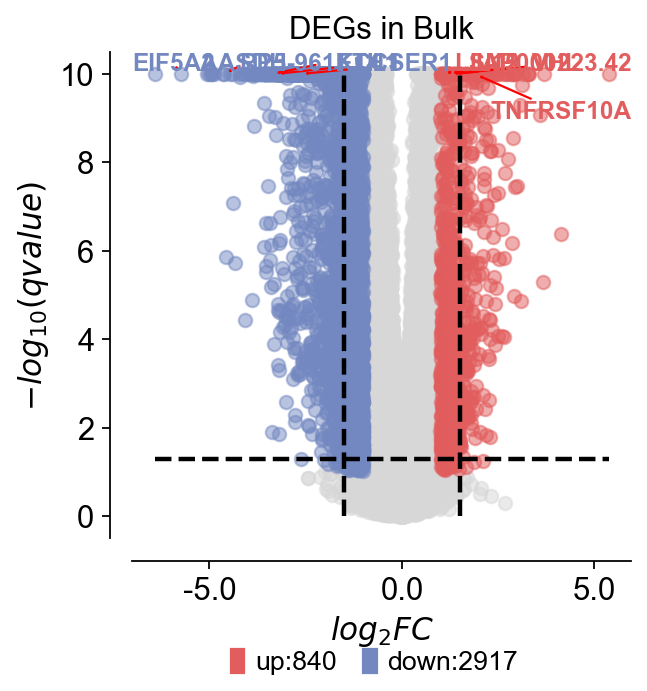

In [6]:
ov.pl.volcano(result,pval_name='qvalue',fc_name='log2FoldChange',
                     pval_threshold=0.05,fc_max=1.5,fc_min=-1.5,
                      pval_max=10,FC_max=10,
                    figsize=(4,4),title='DEGs in Bulk',titlefont={'weight':'normal','size':14,},
                     up_color='#e25d5d',down_color='#7388c1',normal_color='#d7d7d7',
                     up_fontcolor='#e25d5d',down_fontcolor='#7388c1',normal_fontcolor='#d7d7d7',
                     legend_bbox=(0.8, -0.2),legend_ncol=2,legend_fontsize=12,
                     plot_genes=None,plot_genes_num=10,plot_genes_fontsize=11,
                     ticks_fontsize=12,)

## Box plot

For differentially expressed genes in different groups, we sometimes need to compare the differences between different groups, and this is when we need to use box-and-line plots to do the comparison

**Function**: `ov.pl.boxplot`: 

- data: the data to visualize the boxplt example could be found in `seaborn.load_dataset("tips")`
- x_value, y_value, hue: Inputs for plotting long-form data. See examples for interpretation.
- figsize: The size of the generated figure, by default (4,4).
- fontsize: The font size of the tick and labels, by default 12.
- title: The title of the plot, by default ''.


**Function**: `ov.pl.add_palue`: 
- ax: the axes of bardotplot
- line_x1: The left side of the p-value line to be plotted
- line_x2: The right side of the p-value line to be plotted|
- line_y: The height of the p-value line to be plotted
- text_y: How much above the p-value line is plotted text
- text: the text of p-value, you can set `***` to instead `p<0.001`
- fontsize: the fontsize of text
- fontcolor: the color of text
- horizontalalignment: the location of text

In [7]:
import seaborn as sns
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


📊 Boxplot Data Analysis:
   Total samples: 244
   X-axis variable ('day'): ['Fri', 'Sat', 'Sun', 'Thur']
   Hue variable ('sex'): ['Female', 'Male']
   Y-axis variable: 'total_bill' (range: 3.07 - 50.81)

⚙️  Current Function Parameters:
   hue='sex', x_value='day', y_value='total_bill'
   width=0.3, figsize=(4, 2), fontsize=12
   hue_order=None (using alphabetical order)
   📋 Using alphabetical hue order: ['Female', 'Male']

🎯 Box Positioning:
   Number of hue groups: 2
   Box positions: [-0.4, 0.4]
   Box width: 0.3

📈 Sample sizes per group:
   Female × Fri: 9 samples
   Female × Sat: 28 samples
   Female × Sun: 18 samples
   Female × Thur: 32 samples
   Male × Fri: 10 samples
   Male × Sat: 59 samples
   Male × Sun: 58 samples
   Male × Thur: 30 samples

💡 Parameter Optimization Suggestions:
   ✅ Current parameters are optimal for your data!
────────────────────────────────────────────────────────────


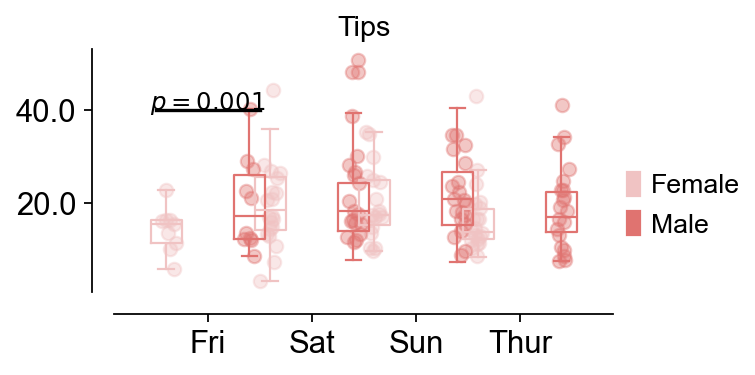

In [8]:
fig,ax=ov.pl.boxplot(data,hue='sex',x_value='day',y_value='total_bill',
              palette=ov.pl.red_color,
              figsize=(4,2),fontsize=12,title='Tips',)

ov.pl.add_palue(ax,line_x1=-0.5,line_x2=0.5,line_y=40,
          text_y=0.2,
          text='$p={}$'.format(round(0.001,3)),
          fontsize=11,fontcolor='#000000',
          horizontalalignment='center',)